In [19]:
PRFX='Mel0724B1ValInf'
# PRFX='Mel0724B1'

In [20]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score as roc_auc
import os, random, torch

def set_seed(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

p_out = f'../output/{PRFX}'

class Param: pass

!ls | grep {PRFX}

res = pickle.load(open(f'{p_out}/results_{PRFX}.p', 'rb'))
param = res['param']
# param.__dict__
p_prp = f'../output/{param.PRFX_PREP}'
dftrn = pd.read_csv(f'{p_prp}/train_all_dedup.csv') 
set_seed(param.SEED); dftrn = dftrn.sample(frac=1.)

fld2stats=res['fld2stats']
fld2trvl=res['fld2trvl']
for fld,stats in fld2stats.items():
    print(f"best_scr: {stats['best_scr']:.3f}; best_epc: {stats['best_epc']};")
    

Mel0724B1ValInf__trnNSB4SZ384_valSZ512.ipynb
best_scr: 0.935; best_epc: 9;
best_scr: 0.930; best_epc: 7;


In [ ]:
Mel0724B1ValInf__trnNSB4SZ384_valSZ512.ipynb
Mel0724B1__NSB4SZ384__newFramework-nan_error.ipynb
Mel0724B1__NSB4SZ384__newFramework_handelnan-dbgrun.ipynb
Mel0724B1__NSB4SZ384__newFramework_handelnan__fillna0.ipynb
Mel0724B1__NSB4SZ384__newFramework_handelnan__nanmean.ipynb
best_scr: 0.933; best_epc: 9;
best_scr: 0.934; best_epc: 7;
best_scr: 0.944; best_epc: 7;
best_scr: 0.932; best_epc: 6;
best_scr: 0.942; best_epc: 3;

In [14]:
vls=[]
oofs=[]
for fld in range(5):
    try:
        ep2oof = pickle.load(open(f'{p_out}/ep2oof_{PRFX}_fld_{fld}.p', 'rb'))
        if len(ep2oof)<param.EPOCHS: break
        _,vl= res['fld2trvl'][fld]
        vls += list(vl)
        ep2oof = np.concatenate(ep2oof, 1)
        oof = ep2oof[:,-param.LASTM:].mean(1)
#         oof = ep2oof[:,-3:].mean(1)
        oofs += list(oof)
        print('fld', fld)
    except FileNotFoundError:
        pass

print('oof', roc_auc(dftrn.target.iloc[vls], oofs))

fld 0
oof 0.9387028133369597


In [15]:
idx20 = set(np.where(dftrn.source==20)[0])
idx=[]
prds=[]
for ind,prd in zip(vls, oofs):
    if ind in idx20: 
        idx.append(ind)
        prds.append(prd)
print('oof20', roc_auc(dftrn.target.iloc[idx], prds))

oof20 0.9349161167501077


2
3
4


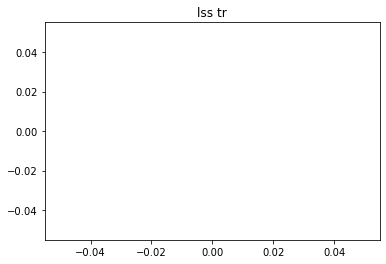

2
3
4


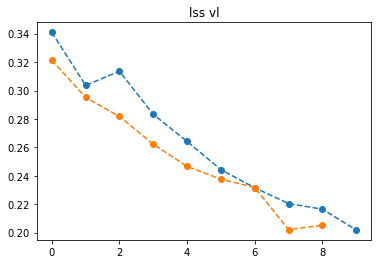

2
3
4


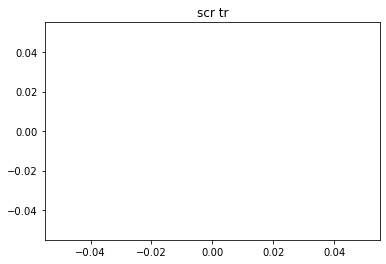

2
3
4


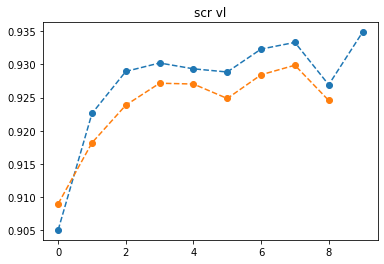

In [16]:
for mtrc in ['lss', 'scr']:
    for k in ['tr','vl',]:
        plt.title(f'{mtrc} {k}')
        for fld in range(5):
            try:
                plt.plot(fld2stats[fld][mtrc][k], 'o--')
            except KeyError as e:
                print(e)
        plt.show()